In [1]:
"in this script you could find all the major basic feature of our network"

'in this script you could find all the major basic feature of our network'

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import gc
import warnings
import numpy as np
import powerlaw
import praw
import random

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
def remove_useless_data(df):
    df_1 = df[df["parent"] == df["to"]]
    # delete duplicate rows from dataframe
    new_df = df.drop(df_1.index)
    #delete useless data to free memory
    del df,df_1
    gc.collect()
    #reset the indexes in the new DataFrame
    new_df.reset_index(inplace=True,drop=True)
    return new_df

In [4]:
if __name__=="__main__":

    data = pd.read_csv("scraping data/data/data_subreddit_direct.csv",index_col=0)
    no_duplicates = remove_useless_data(data)
    G = nx.convert_matrix.from_pandas_edgelist(no_duplicates,source = "parent",target="to",
                                                            edge_attr=True, create_using= nx.DiGraph())

In [8]:
G.number_of_nodes()

24819

In [9]:
G.number_of_edges()

107094

In [10]:
G.is_directed()

True

In [11]:
data.shape

(107094, 6)

In [8]:
data.head()

,parent,to,interactions,crossposts,date,weights
0,nature,environment,1746.0,1,1.619228e+09,7.465655
1,nature,EcoNewsNetwork,154.0,13,1.615282e+09,5.043425
2,nature,PublicLands,3.0,1,1.619177e+09,1.386294
3,nature,EndangeredSpecies,28.0,2,1.618449e+09,3.367296
4,nature,animalimpact,5.0,3,1.615263e+09,1.791759


In [ ]:
"exploration of nodes degree"

In [5]:
for n in G.nodes():
    
    pass
for e in G.edges():
    
    pass

In [7]:
#Degree Centrality
indegrees = dict(G.in_degree())
ranks = [(k, v) for k, v in sorted(indegrees.items(), key=lambda item: -item[1])]
ranks[0:10] #put in descending order the first ten nodes by in-degree

[('GoodRisingTweets', 308),
 ('LateStageCapitalism', 221),
 ('aww', 217),
 ('Pikabu', 190),
 ('PublicFreakout', 186),
 ('ABoringDystopia', 181),
 ('premiuminternet', 180),
 ('VaushV', 179),
 ('RuralNewsNetwork', 174),
 ('awfuleverything', 172)]

In [8]:
outdegrees = dict(G.out_degree())
ranks = [(k, v) for k, v in sorted(outdegrees.items(), key=lambda item: -item[1])]
ranks[0:10] #put in descending order the first ten nodes by out-degree

[('interestingasfuck', 2732),
 ('nextfuckinglevel', 2377),
 ('funny', 2071),
 ('PublicFreakout', 1880),
 ('aww', 1613),
 ('Unexpected', 1492),
 ('Damnthatsinteresting', 1336),
 ('memes', 1273),
 ('politics', 1192),
 ('science', 1140)]

In [15]:
#average in degree
sum(dict(G.in_degree()).values())/float(len(G))

4.31500060437568

In [16]:
#average out degree
sum(dict(G.out_degree()).values())/float(len(G))

4.31500060437568

In [4]:
#average degree
sum(dict(G.degree()).values())/float(len(G))

8.63000120875136

In [17]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

In [ ]:
"degree distribution plot"

Calculating best minimal value for power law fit


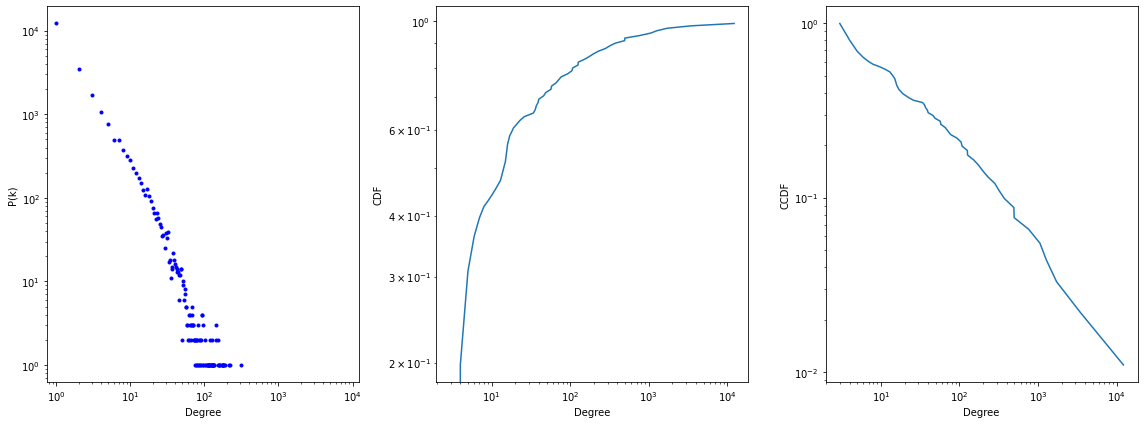

In [18]:
plot_dist(G)

In [4]:
nx.density(G) #that's allow us to discover the density

0.00017386576695848496

In [24]:
H= G.to_undirected()
nx.number_connected_components(H) #number of conneted components present in the network

1

In [28]:
nx.diameter(H.subgraph(comps[0])) #It is the shortest distance between the two most distant nodes in the network

10

In [29]:
nx.triangles(H) #how many triangles each nodes close with his neighbours

{'nature': 58,
 'environment': 2527,
 'EcoNewsNetwork': 939,
 'PublicLands': 7,
 'EndangeredSpecies': 30,
 'animalimpact': 27,
 'sharks': 62,
 'Soil': 0,
 'Fuck_This_Guy': 209,
 'vegan': 1131,
 'Animals': 13,
 'UpliftingNews': 1311,
 'organizedhealing': 58,
 'Green_News': 352,
 'wildlifecorridors': 78,
 'Outdoors': 109,
 'SpeculativeEvolution': 11,
 'WomenInNews': 14,
 'TheFightThatMatters': 1134,
 'WomensRightsNews': 46,
 'prochoice': 1,
 'worldnews': 7190,
 'europes': 27,
 'indepthstories': 54,
 'Midwives': 0,
 'catalonia': 3,
 'blackladies': 2,
 'ClimateCrisis': 35,
 'xxstem': 0,
 'HydroHomies': 1673,
 'anime_titties': 613,
 'cleanstreetbets': 15,
 'BigTent': 387,
 'ClimateDenialism': 12,
 'BigAgro': 13,
 'DoomsdayNow': 255,
 'DoomsdayBook': 68,
 'greeninvestor': 9,
 'DivineRightOfKings': 183,
 'energy': 1111,
 'LockCarbon': 82,
 'Toadbook': 42,
 'SGU': 10,
 'GoodRisingTweets': 3117,
 'Reterra': 0,
 'organic': 14,
 'left_urbanism': 120,
 'EnoughMuskSpam': 88,
 'bicycling': 174,
 'pa

In [9]:
#clustering
Clu = dict(nx.clustering(G))# local clustering
ranks = [(k, v) for k, v in sorted(Clu.items(), key=lambda item: -item[1])]
ranks[0:20] #put in descending order the first twenty nodes by local clustering coefficient

[('EnvironmentProtectors', 1.0),
 ('Alternative_Energy', 1.0),
 ('DailyNewsPosts', 1.0),
 ('WuhanVirus', 1.0),
 ('TheyTrustMe', 1.0),
 ('PlanPlantPlanet', 1.0),
 ('Nio', 1.0),
 ('westlinn', 1.0),
 ('Charlottesville', 1.0),
 ('bearpuppers', 1.0),
 ('iamatotoalpieceofshit', 1.0),
 ('WatchTrumpettesCry', 1.0),
 ('totalfuckingbullshit', 1.0),
 ('thathurts', 1.0),
 ('Buttholeass', 1.0),
 ('HKRising', 1.0),
 ('mamasaidknockyouout', 1.0),
 ('elevatorgore', 1.0),
 ('SomeGoodNews', 1.0),
 ('LiveIsBetter', 1.0)]

In [31]:
nx.average_clustering(G) #overall level of local clustering in a network 

0.1024324286592494